## Introduction

**This notebook approximately takes 15mins.** In this notebook, we will demonstrate how to use the built-in visualization function, its working principles, and how to utilize it to fast visualaize your customized circuit. Note that as we have described, you must follow the advanced naming rules for the built-in visualization functions to work properly.

### Part I: Visualization Basics

In [1]:
import numpy as np
from spode.util import generate, visualize
from spode.core import Circuit

### Direcly Call ```Visualize``` on ```circuit_element```

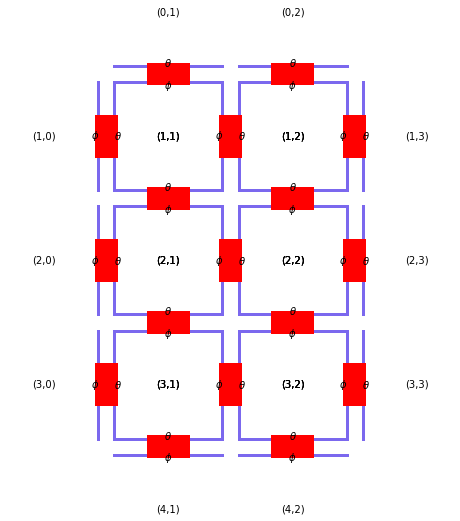

In [2]:

# generate a 3 by 2 square mesh, with all TBUs initilized following init_dict
circuit_element = generate('square_1', [3, 2], init_dict={'theta': 0, 'phi': 0.5 * np.pi, 'l': 250e-6})

# do the visualization, the variable 'annotate' controls what will be displayed on the figure.
visualize(circuit_element, placement='square_1', annotate=['all_cell', 'all_ps_symbol'])

Readers might want to try the following variations of the command to have a quick feeling of the ```visualize()``` function. For detailed meaning of each variable, please refer to the document. 

```
visualize(circuit_element, placement='square_1', annotate=['all_ps_value'])
visualize(circuit_element, placement='square_1', line2d_property={'color':'green'}, annotate=['all_cell'])
visualize(circuit_element, placement='square_1', polygon_property={'color':'yellow'}, annotate=[])
visualize(circuit_element, placement='square_1', text_property={'fontsize':16}, annotate=[])
visualize(circuit_element, placement='square_1', title='Test title', annotate=[])
```

By adjusting the input variables of ```visualize()``` function, readers could obtain a figure satsifying their requirements on color, line width, etc.

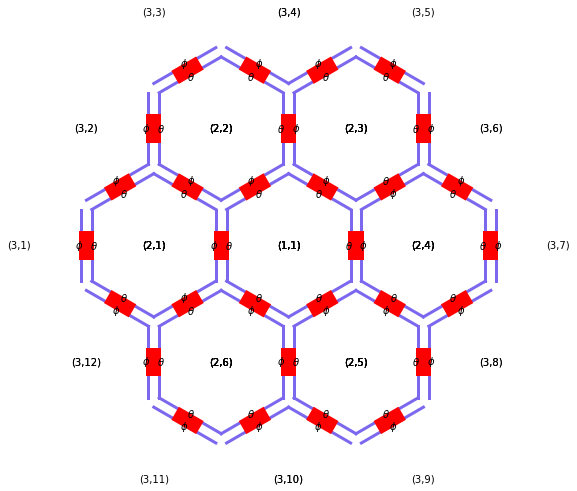

In [3]:
# For pure visualization purpose, init_dict could be {}. Well, this makes sense, right?
circuit_element = generate('hexagonal_1', [2], init_dict={})

visualize(circuit_element, 'hexagonal_1', line2d_property={}, polygon_property={},
              annotate=['all_cell', 'all_ps_symbol'])

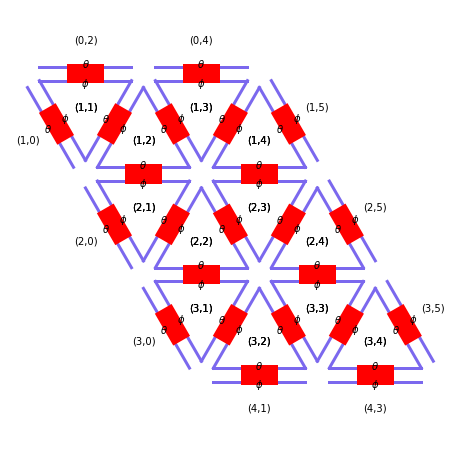

In [4]:
circuit_element = generate('triangular_1', [3, 4], init_dict={'theta': 0, 'phi': 0.5 * np.pi})
visualize(circuit_element, 'triangular_1', line2d_property={}, polygon_property={},
              annotate=['all_cell', 'all_ps_symbol'])

All built-in placements (such as ```triangular_1```, ```square_1```) are supported by the visualization function. Readers are recommended to compare the above three figures with those we manually draw in Part II of Lesson 3. 

### Call ```Visualize``` Method of a ```Circuit``` Instance

It is the same to call ```visualize``` method of a ```Circuit``` instance to do visualization.

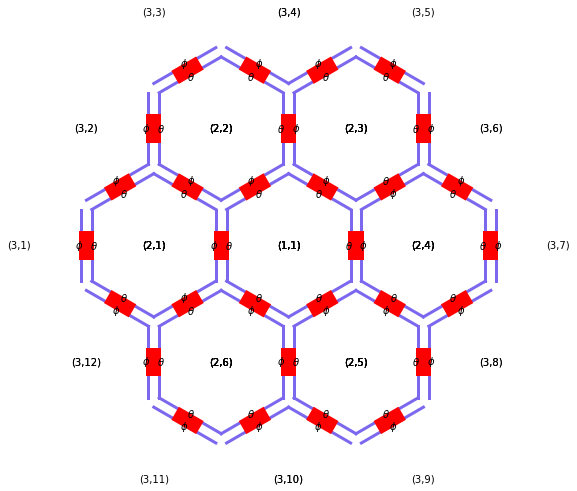

In [5]:
circuit = Circuit(circuit_element=generate('hexagonal_1', [2], init_dict={}),
                  mode_info={},
                  omega=np.array([]),
                  srce_node={},
                  prob_node=[],
                  deri_node=[],
                  deri_vari=[])
circuit.visualize('hexagonal_1', line2d_property={}, polygon_property={}, annotate=['all_cell', 'all_ps_symbol'])
# the parameters of circuit.visualize() are identical to visualize(), except that 'circuit_element' is not needed.

The above example might be uninteresting, as directly feeding ```circuit_element``` to the ```visualize``` function is more straightforward. However, under one scenario, calling ```circuit.visualize()``` might be of interests. That is after calling ```circuit.solve()``` and the ```annotate``` variable in ```circuit.visualize()``` specifies that node responses need to be plotted.

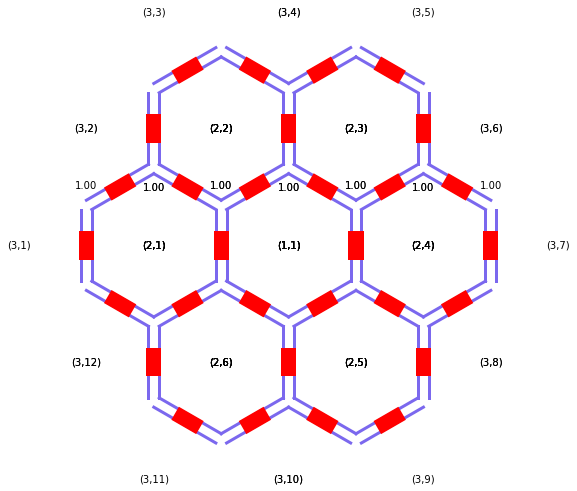

In [6]:
circuit_element = generate('hexagonal_1', [2], init_dict={'theta': 0.0, 'phi': 0.0, 'l': 250e-6})

mode_info = {'neff': 2.35, 'ng': 4.0, 'wl': 1550e-9}  # neff and ng at wl=1550nm is provided
omega = np.linspace(192.5, 193.5, 1000) * 1e12 * 2 * np.pi  # simulation frequency range
prob_node = ['n_1#1_p1']  # the magnitude of which ports are returned
deri_node = []  # the magnitude derivative of which ports are returned
srce_node = {'n_3#2_p6': 1.0}  # the value of the source and where it is injected
deri_vari = []  # the derivative will be calculated w.r.t.

circuit = Circuit(circuit_element=circuit_element,
                      mode_info=mode_info,
                      omega=omega,
                      srce_node=srce_node,
                      prob_node=prob_node,
                      deri_node=deri_node,
                      deri_vari=deri_vari)

circuit.solve()

# 'all_node': 'abs', specifies that the abs(node response) will be displayed
# 'ratio2center': 0.2, specifies where the node response will be displayed.
#                 When it goes to 0.0, response will be displayed exactly at node; 
#                 When it goes to 1.0, response will be displayed at exactly the cell center.
# By default, the node responses at omega[0] will be displayed.
# By default, only the node response with modulus larager than 0.2 will be displayed.
circuit.visualize('hexagonal_1', line2d_property={}, polygon_property={}, annotate=['all_cell', {'all_node': 'abs', 'ratio2center':0.2}])

The visualization is consistent with our intuition: We have let all ```theta``` and ```phi``` equal to ```0.0```, so that all TBUs are in cross state.

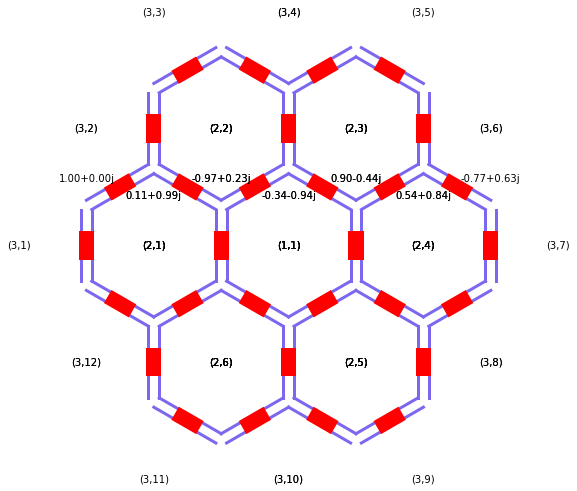

In [7]:
# anoter example
circuit.visualize('hexagonal_1', line2d_property={}, polygon_property={}, annotate=['all_cell', {'all_node': 'complex'}])

Readers are highly recommended to try the following varations before moving on:

```
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'abs'}, 'ratio2center':0.8])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'abs'}, 'frequency_index': 2])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'abs'}, 'filter_function': lambda: True])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'real'}])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'imag'}])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'angle'}])
circuit.visualize('hexagonal_1', annotate=['all_cell', {'all_node': 'name'}])

```

Note that if you call ```circuit.visualize()``` with ```annotate``` containing ```{'all_node': 'abs', ....}``` before ```circuit.solve()```, then ```Spode``` will raise an error and stop, since node responses haven't been calculated yet. For all built-in placements in ```Spode```, you only need to specifiy several parameters related to the figure style when calling ```visualize```. Then the figure will be automatically generated in several seconds.

### Part II: Exploit the Visualization Function for a Customized Circuit

In this part, we demonstrate how to utilize the built-in ```visualize``` function to plot a customized circuit. **To do so, you must follow the advanced naming rules.** Otherwise, the plotted figure might be problematic. Let us re-visit ```Case 2``` in Lesson 3. We again, re-plot the figure below.

<img src="figs/case2.png" width="400" align="center"/>

Following the advanced naming rules, 

```
circuit_element = {'tbum_aa_bb_suffix':{'ln': ['n_aa_id2', 'n_bb_id1'], 'rn': ['n_aa_id4', 'n_bb_id3'],...}
```

is valid, corresponding the circuit shown in the figure, while 

``` 
circuit_element_err = {'tbum_aa_bb_suffix':{'ln': ['n_aa_id4', 'n_bb_id3'], 'rn': ['n_aa_id2', 'n_bb_id1'],...}
```

is invalid (or precisely, it doesn't depict the case shown in the figure). Let us apply ```visualize``` on each of the defintion and see what we obtain.

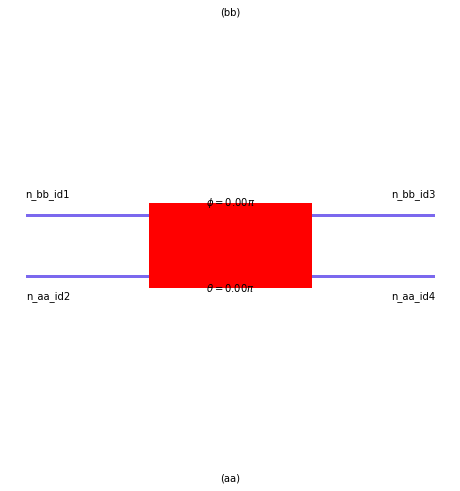

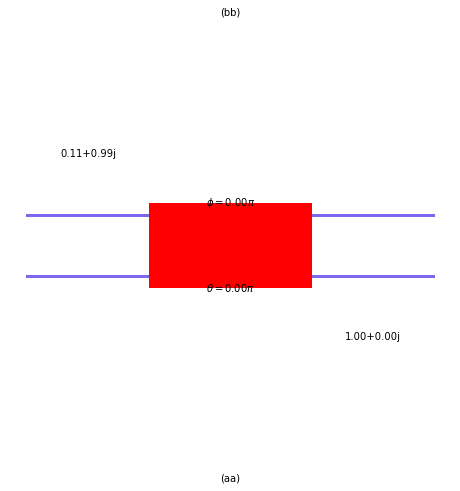

In [8]:
# the correct case
circuit_element = {'tbum_aa_bb_suffix': {'ln': ['n_aa_id2', 'n_bb_id1'], 'rn': ['n_aa_id4', 'n_bb_id3'], 
                                         'theta':0.0, 'phi':0.0,'l': 250e-6}}
 
mode_info = {'neff': 2.35, 'ng': 4.0, 'wl': 1550e-9}  # neff and ng at wl=1550nm is provided
omega = np.linspace(192.5, 193.5, 1000) * 1e12 * 2 * np.pi  # simulation frequency range
prob_node = []  # the magnitude of which ports are returned
deri_node = ['n_bb_id1']  # the magnitude derivative of which ports are returned
srce_node = {'n_aa_id4': 1.0}  # the value of the source and where it is injected
deri_vari = []  # the derivative will be calculated w.r.t.
                   
circuit = Circuit(circuit_element=circuit_element,
                      mode_info=mode_info,
                      omega=omega,
                      srce_node=srce_node,
                      prob_node=prob_node,
                      deri_node=deri_node,
                      deri_vari=deri_vari)

circuit.solve(require_grads=False)

# For a customized circuit, to make the visualization function work, you must provide a cell_place_function
# It must take cell_name, tbu_length, tbu_width as inputs, and return a coordiante in xy-plane.
def cell_place_function(cell_name, tbu_length, tbu_width):
    if cell_name == 'bb':
        return np.array([0., 0.])
    if cell_name == 'aa':
        return np.array([0., tbu_length + tbu_width])

circuit.visualize(cell_place_function=cell_place_function, annotate=['all_cell', 'all_ps_symbol_value', {'all_node': 'name', 'ratio2center':0.1, 'filter_function': lambda x: True}])
circuit.visualize(cell_place_function=cell_place_function, annotate=['all_cell', 'all_ps_symbol_value', {'all_node': 'complex'}])

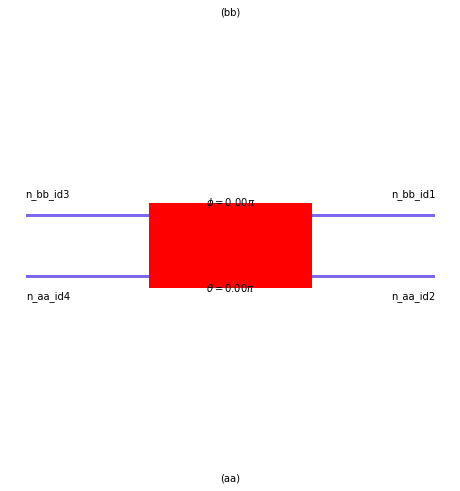

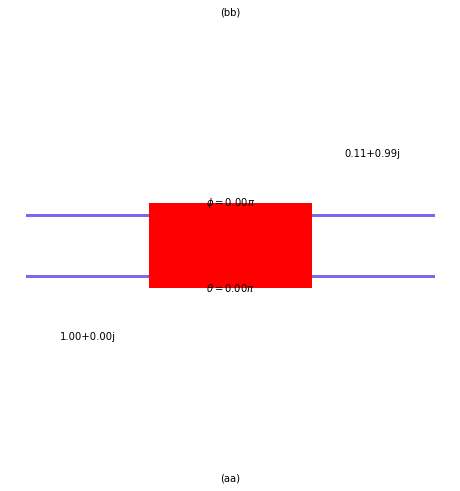

In [9]:
# the errorenous case
circuit_element_err = {'tbum_aa_bb_suffix': {'ln': ['n_aa_id4', 'n_bb_id3'], 'rn': ['n_aa_id2', 'n_bb_id1'], 
                                         'theta':0.0, 'phi':0.0,'l': 250e-6}}       

circuit = Circuit(circuit_element=circuit_element_err,
                      mode_info=mode_info,
                      omega=omega,
                      srce_node=srce_node,
                      prob_node=prob_node,
                      deri_node=deri_node,
                      deri_vari=deri_vari)

circuit.solve(require_grads=False)

circuit.visualize(cell_place_function=cell_place_function, annotate=['all_cell', 'all_ps_symbol_value', {'all_node': 'name', 'ratio2center':0.1, 'filter_function': lambda x: True}])
circuit.visualize(cell_place_function=cell_place_function, annotate=['all_cell', 'all_ps_symbol_value', {'all_node': 'complex'}])

Obviously, the first one is what we desire, and the second one even draw the position of the optical input signal wrong. In summary, please follow the advanced naming rule, if you wish to utilize the built-in ```visualize``` function.

Well, this one TBU case is not interesting. How about we make it a bit more complicated to show the real power of the ```visualize``` function?

In [10]:
# TODO: add a more complicated customized circuit.